In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

data = pd.read_csv("D:/学python/Big_Homework/tianchi_mobile_recommend_train_user.csv")

print(data.duplicated().sum())

4092866


In [3]:
data.drop_duplicates(inplace=True)

In [4]:
print(data.duplicated().sum())

0


In [5]:
data.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     4308015
item_category          0
time                   0
dtype: int64

In [6]:
del data["user_geohash"]

In [7]:
data.head()

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


In [8]:
data["date"]=data.time.str.split(" ").str[0]

In [9]:
data["hour"]=data.time.str.split(" ").str[1]

In [10]:
del data["time"]

In [11]:
data.head()

,user_id,item_id,behavior_type,item_category,date,hour
0,98047837,232431562,1,4245,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16,21


In [12]:
for i in data.columns[:2]:
    data[i]=data[i].astype("str")

In [13]:
data["date"]=pd.to_datetime(data.date)

In [14]:
data["hour"]=data.hour.astype("int")

In [15]:
data=data.sort_values(by=["date","hour"])

In [16]:
data.head()

,user_id,item_id,behavior_type,item_category,date,hour
2577,112707614,343080076,1,13230,2014-11-18,0
3000,112707614,346570272,1,5689,2014-11-18,0
5691,116101597,70407447,1,6512,2014-11-18,0
5727,116101597,327916552,1,6512,2014-11-18,0
6811,117903708,133429705,1,10725,2014-11-18,0


In [17]:
data=data.reset_index(drop=True)

In [18]:
data.head()

,user_id,item_id,behavior_type,item_category,date,hour
0,112707614,343080076,1,13230,2014-11-18,0
1,112707614,346570272,1,5689,2014-11-18,0
2,116101597,70407447,1,6512,2014-11-18,0
3,116101597,327916552,1,6512,2014-11-18,0
4,117903708,133429705,1,10725,2014-11-18,0


In [19]:
pv_daily=data[data.behavior_type==1].groupby("date").count()["user_id"]

In [20]:
pv_daily

date
2014-11-18    215480
2014-11-19    213108
2014-11-20    206740
2014-11-21    196121
2014-11-22    213292
2014-11-23    225481
2014-11-24    224427
2014-11-25    214498
2014-11-26    209100
2014-11-27    217105
2014-11-28    198522
2014-11-29    214018
2014-11-30    234322
2014-12-01    230391
2014-12-02    237012
2014-12-03    238891
2014-12-04    233077
2014-12-05    210673
2014-12-06    243701
2014-12-07    250879
2014-12-08    248735
2014-12-09    257714
2014-12-10    274208
2014-12-11    320740
2014-12-12    430610
2014-12-13    262396
2014-12-14    260525
2014-12-15    256277
2014-12-16    253716
2014-12-17    246536
2014-12-18    240783
Name: user_id, dtype: int64

In [21]:
uv_daily=data.groupby('date').nunique()['user_id'].reset_index().rename(columns={'user_id':'uv'})

In [22]:
uv_daily.head()

,date,uv
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187


In [23]:
%matplotlib notebook

In [24]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


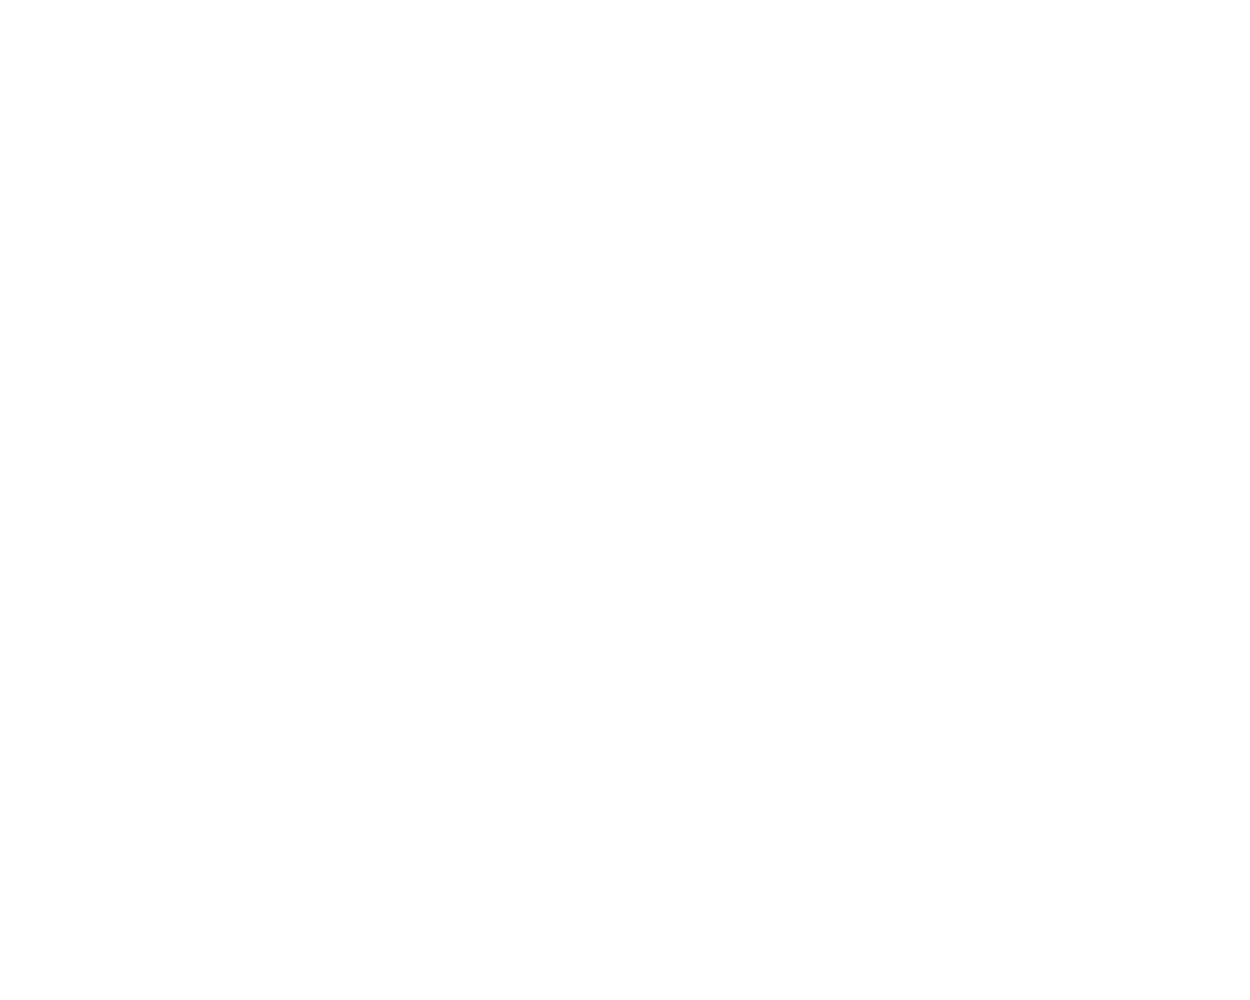

In [25]:
fig,axes=plt.subplots(2,1,figsize=(10,8),sharex=True)

In [26]:
pv_daily.plot(x="date",y="pv",ax=axes[0])

<AxesSubplot:xlabel='date'>

In [27]:
plt.show()

In [28]:
uv_daily.plot(x="date",y="uv",ax=axes[1])

<AxesSubplot:xlabel='date'>

In [29]:
plt.show()

In [30]:
axes[0].set_title("pv_hour")

Text(0.5, 1.0, 'pv_hour')

In [31]:
axes[0].set_title("uv_hour")

Text(0.5, 1.0, 'uv_hour')

In [32]:
import matplotlib.ticker as ticker

In [33]:
axes[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))
axes[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))

In [34]:
from IPython.display import display

<IPython.core.display.Javascript object>


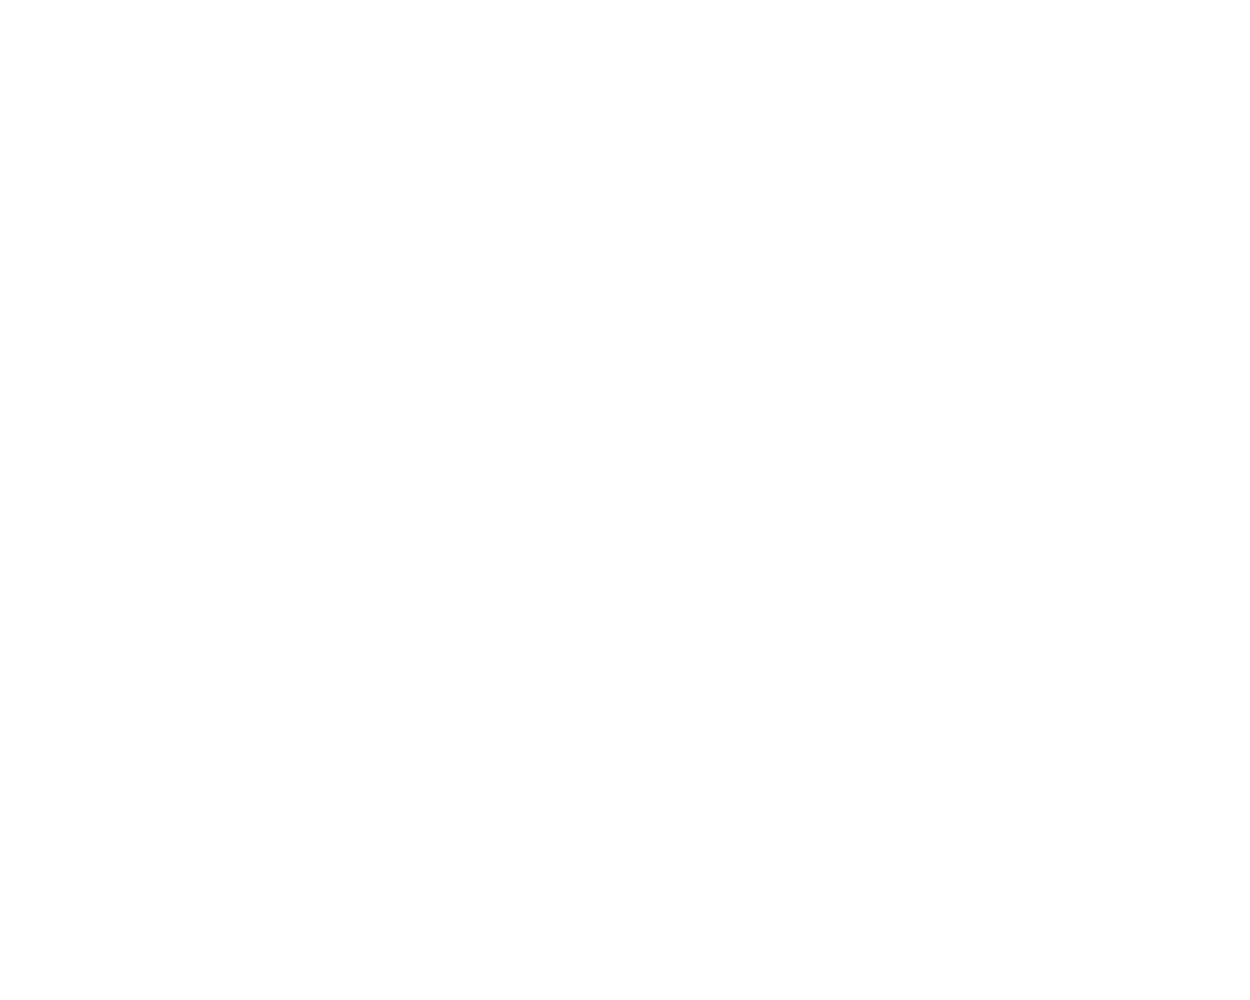

In [35]:
display(fig)

In [36]:
data.head()

,user_id,item_id,behavior_type,item_category,date,hour
0,112707614,343080076,1,13230,2014-11-18,0
1,112707614,346570272,1,5689,2014-11-18,0
2,116101597,70407447,1,6512,2014-11-18,0
3,116101597,327916552,1,6512,2014-11-18,0
4,117903708,133429705,1,10725,2014-11-18,0


In [37]:
buy_daily=data[data.behavior_type==4].groupby('date')['behavior_type'].count()

In [38]:
buy_daily#日成交量

date
2014-11-18     3416
2014-11-19     3350
2014-11-20     3168
2014-11-21     2723
2014-11-22     3208
2014-11-23     3089
2014-11-24     3149
2014-11-25     3178
2014-11-26     3258
2014-11-27     3385
2014-11-28     2963
2014-11-29     2950
2014-11-30     3337
2014-12-01     3544
2014-12-02     3338
2014-12-03     3541
2014-12-04     3368
2014-12-05     2968
2014-12-06     3052
2014-12-07     3016
2014-12-08     3152
2014-12-09     3138
2014-12-10     2987
2014-12-11     3008
2014-12-12    14321
2014-12-13     3208
2014-12-14     3229
2014-12-15     3468
2014-12-16     3523
2014-12-17     3303
2014-12-18     3334
Name: behavior_type, dtype: int64

In [39]:
paying_user=data[data.behavior_type==4].groupby("date")["user_id"].nunique()

In [40]:
paying_user

date
2014-11-18    1539
2014-11-19    1511
2014-11-20    1492
2014-11-21    1330
2014-11-22    1411
2014-11-23    1436
2014-11-24    1524
2014-11-25    1497
2014-11-26    1487
2014-11-27    1527
2014-11-28    1442
2014-11-29    1377
2014-11-30    1534
2014-12-01    1657
2014-12-02    1585
2014-12-03    1697
2014-12-04    1585
2014-12-05    1493
2014-12-06    1452
2014-12-07    1403
2014-12-08    1551
2014-12-09    1429
2014-12-10    1442
2014-12-11    1449
2014-12-12    3897
2014-12-13    1549
2014-12-14    1506
2014-12-15    1627
2014-12-16    1650
2014-12-17    1570
2014-12-18    1552
Name: user_id, dtype: int64

In [41]:
active_user=data.groupby("date").nunique()["user_id"]

In [42]:
active_user

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
2014-11-23    6373
2014-11-24    6513
2014-11-25    6351
2014-11-26    6357
2014-11-27    6359
2014-11-28    6189
2014-11-29    6224
2014-11-30    6379
2014-12-01    6544
2014-12-02    6550
2014-12-03    6585
2014-12-04    6531
2014-12-05    6367
2014-12-06    6440
2014-12-07    6422
2014-12-08    6564
2014-12-09    6566
2014-12-10    6652
2014-12-11    6894
2014-12-12    7720
2014-12-13    6776
2014-12-14    6668
2014-12-15    6787
2014-12-16    6729
2014-12-17    6643
2014-12-18    6582
Name: user_id, dtype: int64

In [43]:
paying_rate=paying_user/active_user

In [44]:
paying_rate

date
2014-11-18    0.242630
2014-11-19    0.235358
2014-11-20    0.235591
2014-11-21    0.211918
2014-11-22    0.228059
2014-11-23    0.225326
2014-11-24    0.233994
2014-11-25    0.235711
2014-11-26    0.233915
2014-11-27    0.240132
2014-11-28    0.232994
2014-11-29    0.221240
2014-11-30    0.240477
2014-12-01    0.253209
2014-12-02    0.241985
2014-12-03    0.257707
2014-12-04    0.242689
2014-12-05    0.234490
2014-12-06    0.225466
2014-12-07    0.218468
2014-12-08    0.236289
2014-12-09    0.217636
2014-12-10    0.216777
2014-12-11    0.210183
2014-12-12    0.504793
2014-12-13    0.228601
2014-12-14    0.225855
2014-12-15    0.239723
2014-12-16    0.245207
2014-12-17    0.236339
2014-12-18    0.235795
Name: user_id, dtype: float64

In [45]:
plt.close()

<IPython.core.display.Javascript object>


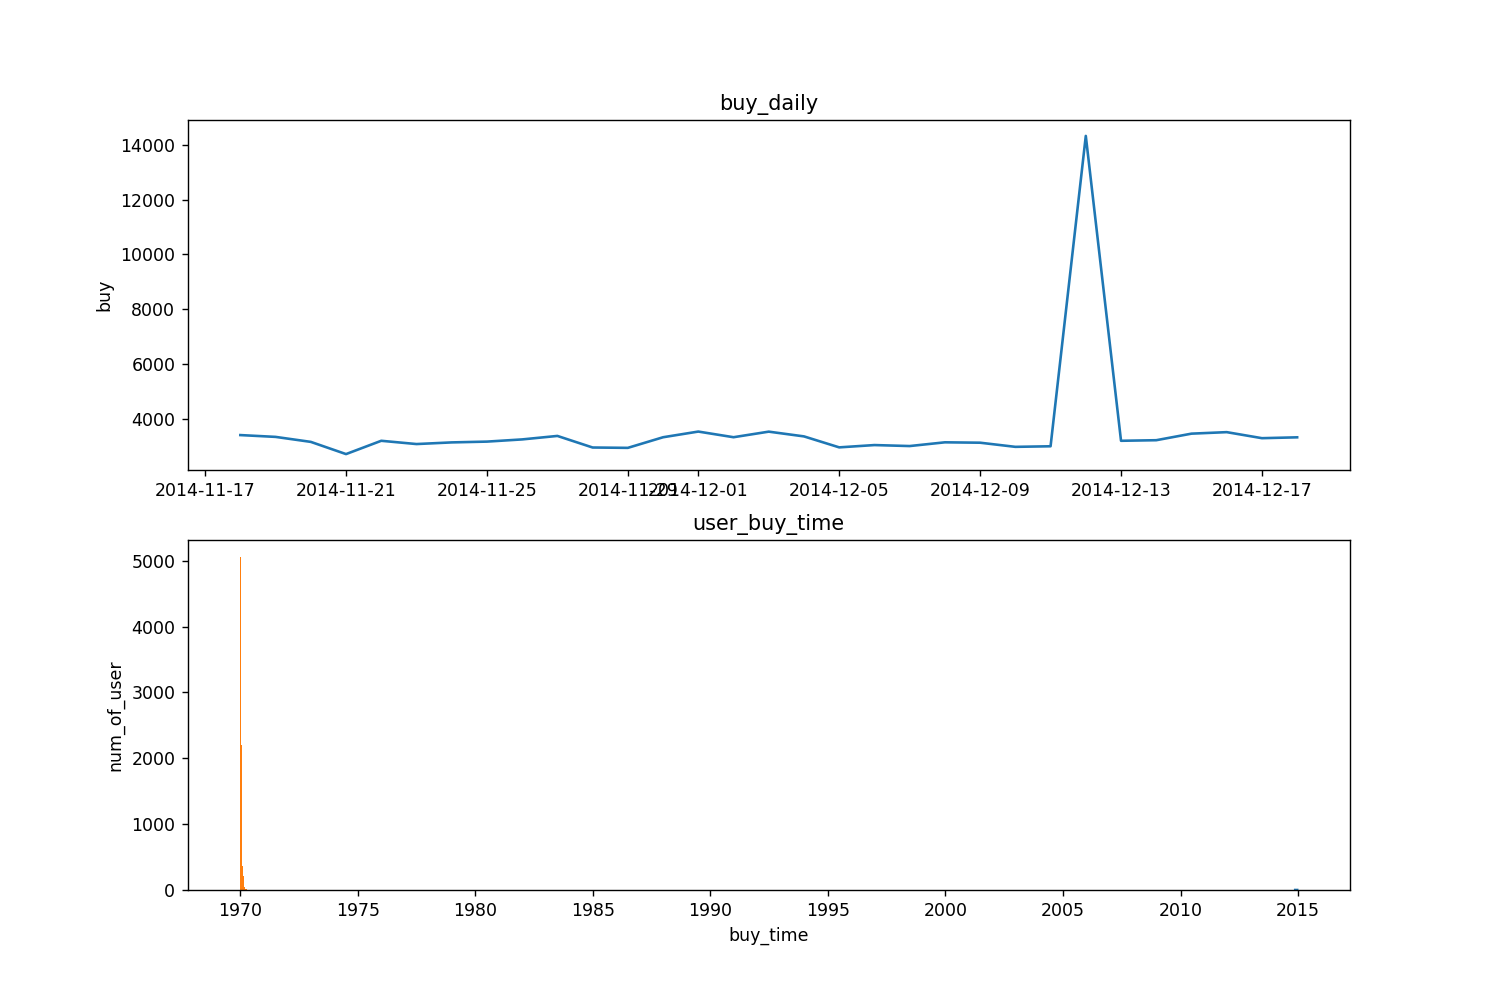

<IPython.core.display.Javascript object>


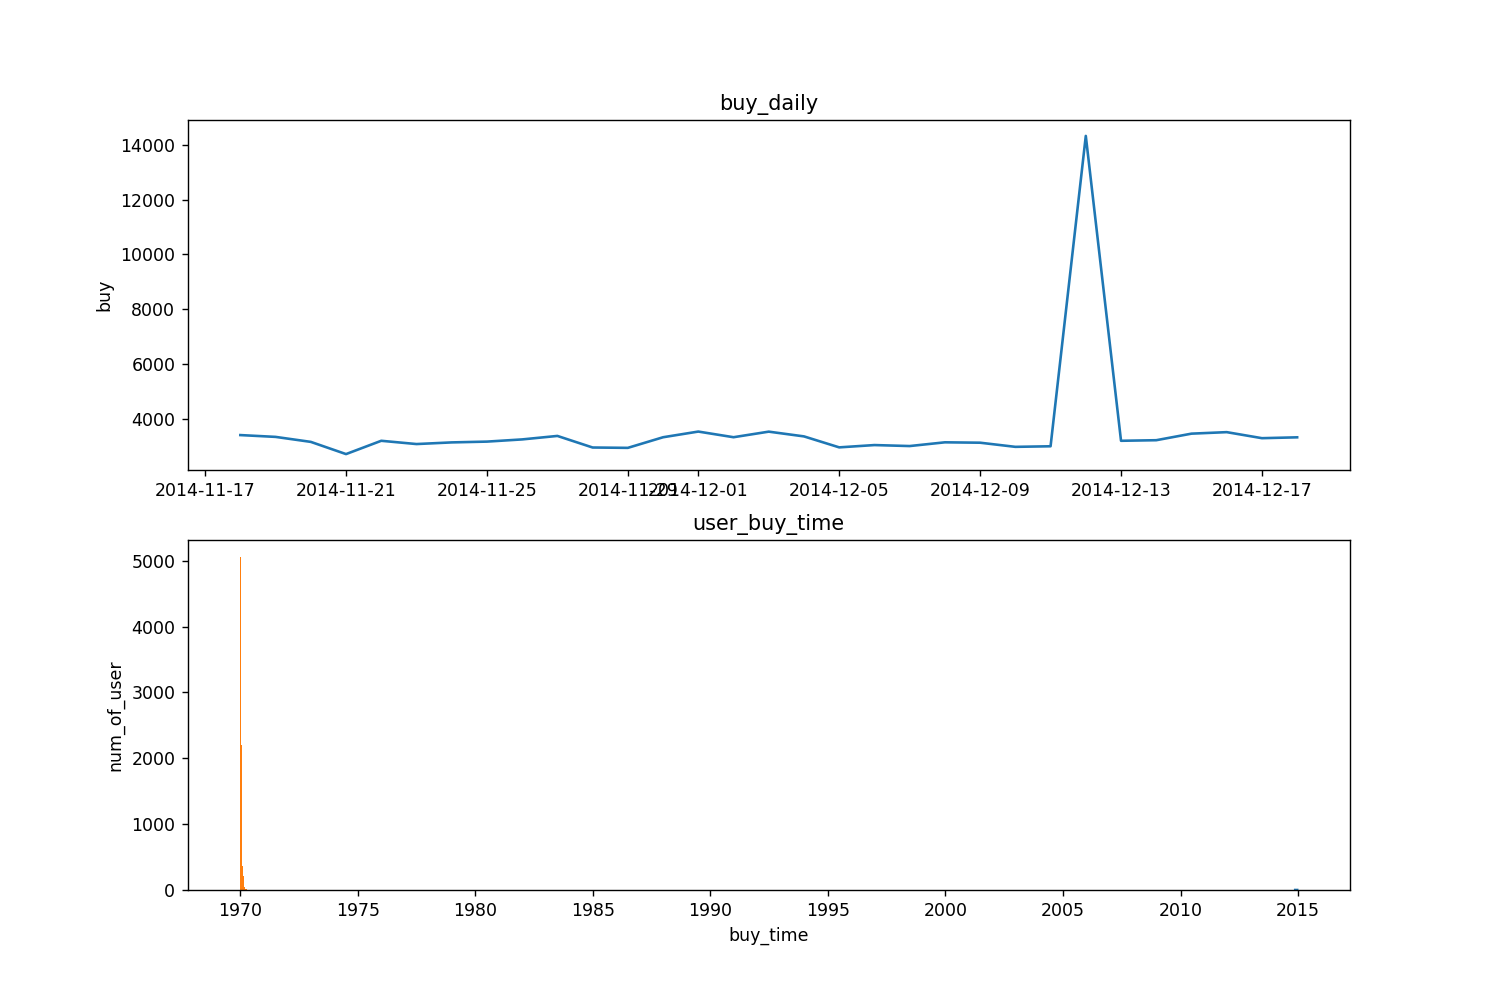

In [46]:
plt.figure(figsize=(12,8))

In [47]:
axes[0]=plt.subplot(211)

In [48]:
axes[0].set_title("buy_daily")

Text(0.5, 1.0, 'buy_daily')

In [49]:
axes[0].set_ylabel("buy")

Text(0, 0.5, 'buy')

In [50]:
plt.plot(buy_daily)

In [51]:
plt.show()

In [52]:
axes[1]=plt.subplot(212)

In [53]:
axes[1].set_title("paying_rate_daily")

Text(0.5, 1.0, 'paying_rate_daily')

In [54]:
axes[1].set_ylabel("paying_rate")

Text(0, 0.5, 'paying_rate')

In [55]:
plt.plot(paying_rate)

In [56]:
plt.show()

In [57]:
user_buy_time=data[data.behavior_type==4].groupby("user_id").count()["item_id"]

In [58]:
user_buy_time

user_id
100001878    36
100011562     3
100012968    13
100014060    24
100024529    25
             ..
99960313      8
9996155       5
99963140     19
99968428     34
99989881     17
Name: item_id, Length: 8886, dtype: int64

In [59]:
plt.hist(x=user_buy_time,bins=10,range=[0,100])

(array([5061., 2207.,  829.,  358.,  218.,   98.,   45.,   15.,   11.,
          15.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

In [60]:
plt.xlabel("buy_time")

Text(0.5, 0, 'buy_time')

In [61]:
plt.show()

In [62]:
from IPython.display import display

<IPython.core.display.Javascript object>


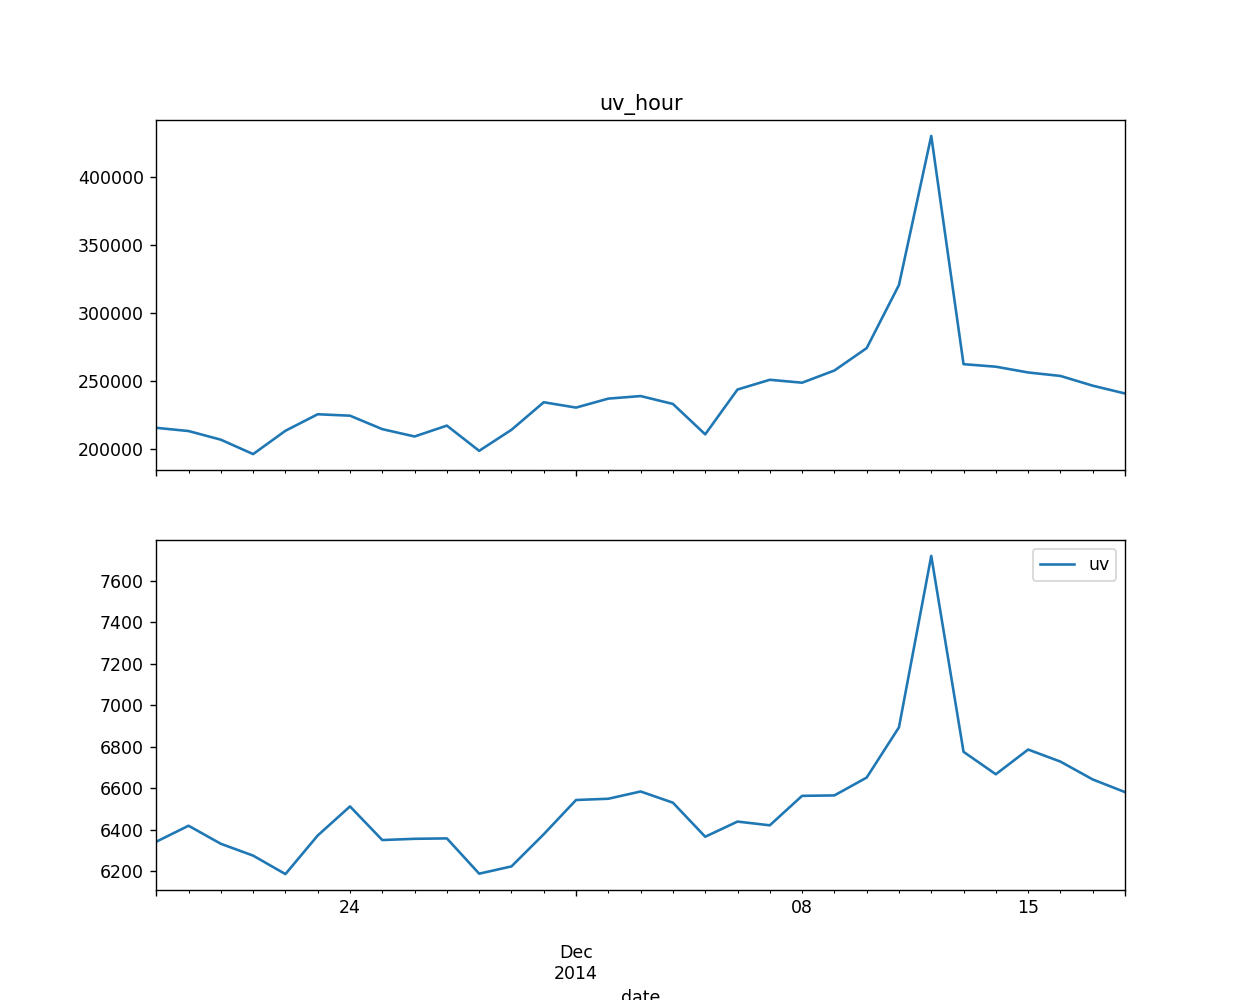

In [63]:
display(fig)

In [64]:
plt.ylabel('num_of_user')

Text(0, 0.5, 'num_of_user')

In [65]:
plt.title('user_buy_time')

Text(0.5, 1.0, 'user_buy_time')

In [66]:
total_buy_time=data[data.behavior_type==4].count()["user_id"]

In [67]:
total_buy_time

110672

In [68]:
total_paying_user=data[data.behavior_type==4].nunique()["user_id"]

In [69]:
total_paying_user

8886

In [70]:
capita_user_buy_time=total_buy_time/total_paying_user

In [71]:
capita_user_buy_time

12.45464776052217

In [72]:
user_buy_time=data[data.behavior_type==4].groupby("user_id").count()

In [73]:
user_buy_time

,item_id,behavior_type,item_category,date,hour
user_id,,,,,
100001878,36,36,36,36,36
100011562,3,3,3,3,3
100012968,13,13,13,13,13
100014060,24,24,24,24,24
100024529,25,25,25,25,25
...,...,...,...,...,...
99960313,8,8,8,8,8
9996155,5,5,5,5,5
99963140,19,19,19,19,19


In [74]:
user_twice=user_buy_time[user_buy_time["item_id"]>2].count()["item_id"]

In [75]:
user_twice

7428

In [76]:
user_buy=data[data.behavior_type==4].nunique()["user_id"]

In [77]:
rebuy_rate=user_twice/user_buy

In [78]:
rebuy_rate

0.8359216745442268

In [79]:
pv=data.groupby("behavior_type").count()["user_id"].iloc[0]

In [80]:
pv

7479078

In [81]:
favor=data.groupby("behavior_type").count()["user_id"].iloc[1]

In [82]:
cart=data.groupby("behavior_type").count()["user_id"].iloc[2]

In [83]:
buy=data.groupby("behavior_type").count()["user_id"].iloc[3]

In [84]:
pv_favor=favor/pv*100
pv_cart=cart/pv*100
pv_buy=buy/pv*100

In [85]:
print('点击——收藏转化率:','%.2f'%pv_favor,'%')

点击——收藏转化率: 3.22 %


In [86]:
print('点击——购物车转化率：','%.2f'%pv_cart,"%")

点击——购物车转化率： 4.46 %


In [87]:
print('点击——支付转化率：','%.2f'%pv_buy,'%')

点击——支付转化率： 1.48 %


In [88]:
favor_cart_buy=buy/(favor+cart)*100

In [89]:
print("收藏——支付转换率：","%.2f"%favor_cart_buy,"%")

收藏——支付转换率： 19.27 %


In [90]:
last_time=data[data.behavior_type==4].groupby("user_id").max()["date"]

In [91]:
last_time

user_id
100001878   2014-12-18
100011562   2014-12-16
100012968   2014-12-18
100014060   2014-12-18
100024529   2014-12-16
               ...    
99960313    2014-12-13
9996155     2014-12-07
99963140    2014-12-15
99968428    2014-12-14
99989881    2014-12-15
Name: date, Length: 8886, dtype: datetime64[ns]

In [92]:
recency=(pd.to_datetime("2014-12-18")-last_time).dt.days.copy()

In [93]:
recency_avg=recency.mean()

In [94]:
recency

user_id
100001878     0
100011562     2
100012968     0
100014060     0
100024529     2
             ..
99960313      5
9996155      11
99963140      3
99968428      4
99989881      3
Name: date, Length: 8886, dtype: int64

In [95]:
recency_avg

5.811838847625478

In [96]:
recency[recency<recency_avg]=0
recency[recency>recency_avg]=1

In [97]:
recency

user_id
100001878    0
100011562    0
100012968    0
100014060    0
100024529    0
            ..
99960313     0
9996155      1
99963140     0
99968428     0
99989881     0
Name: date, Length: 8886, dtype: int64

In [103]:
frequency = data[data.behavior_type == 4].groupby('user_id').count()['item_id']

In [104]:
frequency

user_id
100001878    36
100011562     3
100012968    13
100014060    24
100024529    25
             ..
99960313      8
9996155       5
99963140     19
99968428     34
99989881     17
Name: item_id, Length: 8886, dtype: int64

In [108]:
rfm = pd.merge(recency, frequency, on='user_id', how='inner')

In [109]:
rfm

,date,item_id
user_id,,
100001878,0,36
100011562,0,3
100012968,0,13
100014060,0,24
100024529,0,25
...,...,...
99960313,0,8
9996155,1,5
99963140,0,19


In [110]:
rfm = rfm.reset_index().rename(columns={'date': 'r', 'item_id': 'f'})

In [111]:
rfm

,user_id,r,f
0,100001878,0,36
1,100011562,0,3
2,100012968,0,13
3,100014060,0,24
4,100024529,0,25
...,...,...,...
8881,99960313,0,8
8882,9996155,1,5
8883,99963140,0,19
8884,99968428,0,34


In [112]:
rfm = rfm[['r', 'f']].astype('str')  # 将 R 和 F 列转为字符串类型
rfm['user_type'] = rfm['r'] + rfm['f']  # 创建用户类型组合

In [113]:
rfm

,r,f,user_type
0,0,36,036
1,0,3,03
2,0,13,013
3,0,24,024
4,0,25,025
...,...,...,...
8881,0,8,08
8882,1,5,15
8883,0,19,019
8884,0,34,034


In [116]:
rfm.groupby('user_type').count()['r'].sort_index(ascending=False).rename(index={
    '11': '重要价值用户：',
    '10': '重要发展用户：',
    '01': '重要保持用户：',
    '00': '重要挽留用户：'
})


user_type
19         133
18         153
170          2
17         196
164          1
          ... 
0104         3
0102         2
0100         3
010        241
重要保持用户：    162
Name: r, Length: 170, dtype: int64